<a href="https://colab.research.google.com/github/habroland/Blog/blob/master/EquivalentLens/EquivalentLensCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equivalent-lens system for an array of lenses. Check this <a href="https://underthemath.wordpress.com/2020/05/31/equivalent-lens-system/">blog</a> for details.

# Functions

In [2]:
def equivSingleLens_2lenses(f1,d12,f2):
    """ Calculates the equivalent single-lens system for an array of two lenses
    
    Arguments:
    f1: Focal length of the first lens
    d12: Distance between the lenses
    f2: Focal length of second lens
    
    Returns:
    df: Front distance
    feff: Effective focal length
    db: Back distance
    
    """
    df = (d12*f1)/(f1+f2-d12)
    feff = (f2*f1)/(f1+f2-d12)
    db = (d12*f2)/(f1+f2-d12)
    
    return df, feff, db

def equivSingleLens(fls,ds):
    """ Calculates the equivalent single-lens system for an array of lenses
    
    Arguments:
    fls: List of N focal lengths
    ds: List of N-1 distances, each one between lenses f_i and f_(i+1)
    
    Returns: Dictionary
    df: Front distance
    feff: Effective focal length
    db: Back distance
    
    """
    assert(len(fls) == len(ds)+1)
    
    df = 0
    feff = fls[0]
    db = 0
    for i in range(len(ds)):
        df_temp, feff, db = equivSingleLens_2lenses(feff,db+ds[i],fls[i+1])
        df+=df_temp
    
    return {"df":df, "feff":feff,"db":db}

# Results

In [17]:
from sympy import *
init_printing()

Four lenses, and the distances between consecutive pairs

In [4]:
F1, F2, F3, F4 = symbols('F1, F2, F3, F4')
D12, D23, D34 = symbols('D12, D23, D34')

Test functions

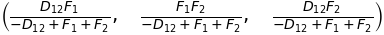

In [18]:
equivSingleLens_2lenses(F1,D12,F2)

In [19]:
equivSingleLens([F1,F2],[D12])

{'db': D12*F2/(-D12 + F1 + F2),
 'df': D12*F1/(-D12 + F1 + F2),
 'feff': F1*F2/(-D12 + F1 + F2)}

In [31]:
expand(simplify(1/(equivSingleLens([F1,F2],[D12])['feff'])))

Compute 1/f3L

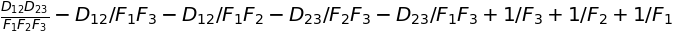

In [30]:
expand(simplify(1/(equivSingleLens([F1,F2,F3],[D12,D23])['feff'])))

Compute 1/f4L

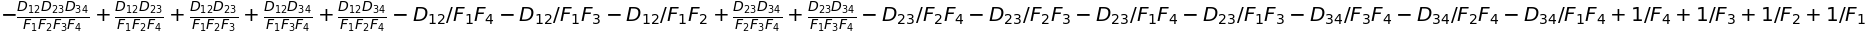

In [29]:
expand(simplify(1/(equivSingleLens([F1,F2,F3,F4],[D12,D23,D34])['feff'])))

Do you see a pattern?

The last terms are the reciprocals of each focal length

The first term is the product of the distances divided by the product of the focal lengths, with a minus sign for an even number of lenses.